# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

Answer: Will free-tier customers convert to paying customers? (yes or no)

#### 2. What are the predictors/covariates? 

Answer: Mostly customer usage data (days since last login, activity score) but the demographic data(age, gender, location, profession) might help too

#### 3. What timeframe is this data relevent for?

Answer: Jan 2015 - April 2015

#### 4. What is the hypothesis?

Answer: Free-tier customers with higher usage (and maybe older in age) are more likely to convert to paying customers.

## Let's get started with the ADMISSIONS dataset

#### 1. Create a data dictionary 

admint - categorical
gre - continuous
gpa - continuous
prestigs - ordinal

We would like to explore the association between X and Y 

Variable | Description | Type of Variable
---| ---| ---
Var 1 | 0 = not thing 1 = thing | categorical
Var 2 | thing in unit X | continuous 

#### 2. What is the outcome?

Answer: Will a person get admitted ? (Yes or No)

#### 3. What are the predictors/covariates? 

Answer: GRE, GPA and Prestige

#### 4. What timeframe is this data relevent for?

Answer: Doesn't specify but it's in the past. An instance of time.

#### 4. What is the hypothesis?

Answer: Anyone with a GRE score of 550, a GPA of 3.25 and a prestige of 2 or below are more likely to get accepted.

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

In [10]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

import statsmodels.formula.api as smf
#read admission csv
wd = '../assets/'
adm = pd.read_csv(wd+'admissions.csv')
print adm.head(5)
print adm.shape

print adm.corr()
print adm.skew()
print adm.describe()

X = adm[['gre']]
Y = adm[['gpa']]

LR = smf.ols(formula = 'Y ~ X', data = adm).fit()
print LR.summary()

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0
(400, 4)
             admit       gre       gpa  prestige
admit     1.000000  0.182919  0.175952 -0.241355
gre       0.182919  1.000000  0.382408 -0.124533
gpa       0.175952  0.382408  1.000000 -0.059031
prestige -0.241355 -0.124533 -0.059031  1.000000
admit       0.787051
gre        -0.150127
gpa        -0.211765
prestige    0.093663
dtype: float64
            admit         gre        gpa    prestige
count  400.000000  398.000000  398.00000  399.000000
mean     0.317500  588.040201    3.39093    2.486216
std      0.466087  115.628513    0.38063    0.945333
min      0.000000  220.000000    2.26000    1.000000
25%      0.000000  520.000000    3.13000    2.000000
50%      0.000000  580.000000    3.39500    2.000000
75%      1.000000  660.000000    3.67000    3.000000
max      1.000000  800.000000  

In [5]:
prstg = pd.get_dummies(adm['prestige'],prefix = 'prestige') 
print prstg.head(5)
data = adm[['admit','gre','gpa']].join(prstg[['prestige_1.0','prestige_2.0','prestige_3.0','prestige_4.0']])
print data.head(5)

   prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0             0             0             1             0
1             0             0             1             0
2             1             0             0             0
3             0             0             0             1
4             0             0             0             1
   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


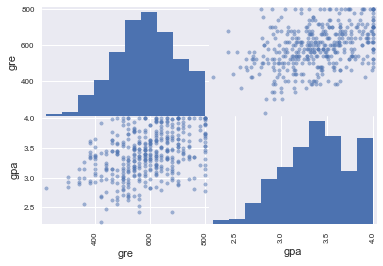

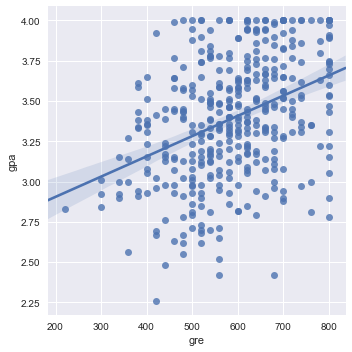

In [11]:

pd.scatter_matrix(adm[['gre','gpa']])
sns.lmplot('gre','gpa',adm)

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To Identify the Problem, Acquire and Parse the Data and finally to test the hypothesis. Find out an equation/correlation between no of lettuce heads used for one case produced.

#### 2a. What are the assumptions of the distribution of data? 

Answer: Data will have a normal distribution. No negative numbers. 

#### 2b. How will you determine the distribution of your data? 

Answer: using Histogram or a distribution plot (and look at skew to see if it is normally distributed or not)

#### 3a. How might outliers impact your analysis? 

Answer: Outliers might affect my regression line (y = Ax + B), lower my r**2 and decrease my coorelation

#### 3b. How will you test for outliers? 

Answer: use a cluster chart for a visual outlier test. look at residual values for a better overall picture.

#### 4a. What is colinearity? 

Answer: When 1 variable is the funciton of another variable.

#### 4b. How will you test for colinearity? 

Answer: Using VIF (Variance Inflation Factor) = 1-r**2

#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

Answer: 1. Get data in .csv
2. parse the data remove null values or negative values (adjustments)
3. run a linear regeression model (OLS)
4. if r2 > 0.75, extract p-value, Intercept value and X value to get formula.

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model